In [24]:
import pandas as pd
import pandas as pd
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re
import openpyxl
songs = pd.read_csv("songs.csv")
ranks = pd.read_csv("songs-ranks.csv")


In [25]:
songs.head(10)

,year,artist.inverted,track,time,genre,song_id
0,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,0
1,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,1
2,2000,3 Doors Down,Kryptonite,3:53,Rock,2
3,2000,3 Doors Down,Loser,4:24,Rock,3
4,2000,504 Boyz,Wobble Wobble,3:35,Rap,4
5,2000,98°,Give Me Just One Night (Una Noche),3:24,Rock,5
6,2000,A*Teens,Dancing Queen,3:44,Pop,6
7,2000,Aaliyah,I Don't Wanna,4:15,Rock,7
8,2000,Aaliyah,Try Again,4:03,Rock,8
9,2000,"Adams, Yolanda",Open My Heart,5:30,Gospel,9


In [26]:
ranks.head(10)

,song_id,date,rank
0,0,2000-02-26,87
1,0,2000-03-04,82
2,0,2000-03-11,72
3,0,2000-03-18,77
4,0,2000-03-25,87
5,0,2000-04-01,94
6,0,2000-04-08,99
7,1,2000-09-02,91
8,1,2000-09-09,87
9,1,2000-09-16,92


In [27]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 6 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
song_id            317 non-null int64
dtypes: int64(2), object(4)
memory usage: 15.0+ KB


In [28]:
ranks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Data columns (total 3 columns):
song_id    5307 non-null int64
date       5307 non-null object
rank       5307 non-null int64
dtypes: int64(2), object(1)
memory usage: 124.5+ KB


W pierwszej dzisiątce notowań, najszęściej znajdował się gatunek: 


'Rock'

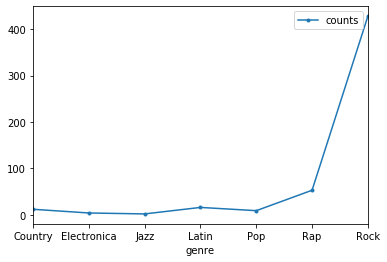

In [29]:
#Określ który z gatunków muzyki znajdował się najczęściej w pierwszej 10 notowań?
#merge ranks oraz songs
result = pd.merge(ranks,
                 songs[['song_id', 'genre']],
                 on='song_id')
#Wydzielenie wyników które znajdują się w pierwszej dzisiątce
result = result.loc[result['rank'] < 11]
#Pogrupowanie po gatunkach
result = result.groupby(['genre']).size().reset_index(name='counts')
#wizualizacja wyników
result.plot(x='genre', y='counts', marker='.')
result = result.sort_values(['counts'], ascending=[False])
print("W pierwszej dzisiątce notowań, najszęściej znajdował się gatunek: ")
result['genre'].iloc[0]

W pierwszej dzisiątce notowań, najszęściej znajdowały się utwpry o długości: 


'3:52'

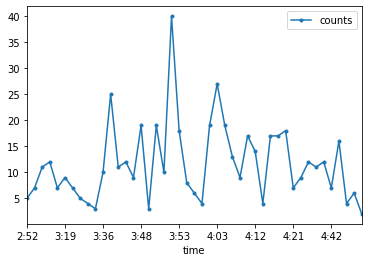

In [30]:
#Sprawdź która grupa najczęściej zdobywała miejsce w pierwszej 10 a jaka w ostatniej
#merge ranks oraz songs
duration = pd.merge(ranks,
                 songs[['song_id', 'time']],
                 on='song_id')
#Wydzielenie wyników które znajdują się w pierwszej dzisiątce
duration = duration.loc[duration['rank'] < 11]
#Pogrupowanie po dlugości utworu
duration = duration.groupby(['time']).size().reset_index(name='counts')
#wizualizacja wyników
duration.plot(x='time', y='counts', marker='.')
duration = duration.sort_values(['counts'], ascending=[False])
print("W pierwszej dzisiątce notowań, najszęściej znajdowały się utwpry o długości: ")
duration['time'].iloc[0]

W ostatniej dzisiątce notowań, najszęściej znajdowały się utwpry o długości: 


'3:44'

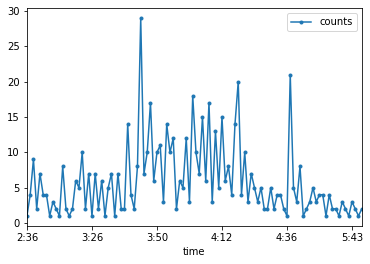

In [31]:
#Sprawdź która grupa najczęściej zdobywała miejsce w pierwszej 10 a jaka w ostatniej
#merge ranks oraz songs
duration = pd.merge(ranks,
                 songs[['song_id', 'time']],
                 on='song_id')
#Wydzielenie wyników które znajdują się w ostatniej dzisiątce
duration = duration.loc[duration['rank'] > 89]
#Pogrupowanie po dlugości utworu
duration = duration.groupby(['time']).size().reset_index(name='counts')
#wizualizacja wyników
duration.plot(x='time', y='counts', marker='.')
duration = duration.sort_values(['counts'], ascending=[False])
print("W ostatniej dzisiątce notowań, najszęściej znajdowały się utwpry o długości: ")
duration['time'].iloc[0]